In [1]:
import numpy as np
import matplotlib.pyplot as plt
import starry

starry.config.lazy = False
starry.config.quiet = True

In [2]:
# importing the data into arrays
# first column of the data file is phase data
TessPhaseHalf = np.loadtxt("GD356allTess.dat", usecols=(0))
TessPhase = np.concatenate((TessPhaseHalf, TessPhaseHalf+1))
# second column of the data file is flux data
TessFluxHalf = np.loadtxt("GD356allTess.dat", usecols=(1))
TessFlux = np.concatenate((TessFluxHalf+1, TessFluxHalf+1))
# third column of the data file is flux error
TessErrorHalf = np.loadtxt("GD356allTess.dat", usecols=(2))
TessError = np.concatenate((TessErrorHalf, TessErrorHalf))

In [3]:
def mean_data(Phase, Flux, Error, bins):

    Phase_split = np.array_split(Phase, bins)
    Flux_split = np.array_split(Flux, bins)
    Error_split = np.array_split(Error, bins)

    meanPhase = [] * bins
    meanFlux = [] * bins
    meanError = [] * bins

    for i in range(bins):

        meanPhase_i = np.mean(Phase_split[i])
        meanFlux_i = np.sum(Flux_split[i] / (Error_split[i]**2))/ np.sum(1/(Error_split[i]**2))

        meanError_i = np.sqrt(1/np.sum(1/(Error_split[i]**2)))

        meanPhase.append(meanPhase_i)
        meanFlux.append(meanFlux_i)
        meanError.append(meanError_i)
        
    return meanPhase, meanFlux, meanError

meanPhase, meanFlux, meanError = mean_data(TessPhase, TessFlux, TessError, 200)

In [4]:
flux = meanFlux/np.amax(meanFlux)
flux_err = np.mean(meanError)
theta = np.multiply(meanPhase, 360)

In [14]:
map = starry.Map(ydeg=1)
map.y

array([1., 0., 0., 0.])

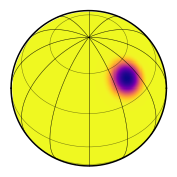

In [2]:

map = starry.Map(ydeg=30,)
map.spot(contrast=0.35117, radius=11.26609, lat=47.30160, lon=45.35863)
map.inc = 40.95931
map.show()

In [3]:
map.y

array([ 1.00000000e+00, -4.28134926e-03, -2.77588173e-03, -2.81085108e-03,
       -4.49165526e-03, -4.43577529e-03,  1.16577945e-03, -2.91223700e-03,
        1.94627146e-03, -7.62358845e-04, -5.42389513e-03, -5.04629566e-04,
        3.68208410e-03, -3.31306434e-04,  2.35021873e-03,  4.38675365e-03,
        2.86127254e-03, -1.02932954e-03, -2.07416948e-03,  3.46641181e-03,
        2.22712436e-03,  2.27581699e-03,  8.98754830e-04,  5.92295234e-03,
        2.68175257e-03,  3.26778886e-03,  4.20380415e-03, -5.79190140e-04,
        2.51799842e-03,  3.55785977e-03, -1.27904775e-03,  2.33585567e-03,
       -1.09106959e-03,  3.33276708e-03,  3.94005199e-03, -7.88672663e-04,
        9.50548184e-04,  5.14211638e-03,  2.94163670e-03,  2.29133769e-04,
        4.04255744e-03,  2.01185124e-04, -3.01179150e-03,  1.32084861e-04,
       -1.75167366e-03, -1.31847804e-03,  2.75707457e-03, -1.24103692e-03,
       -2.65221869e-03, -1.38889889e-03,  1.57916926e-03,  4.15726182e-03,
       -8.36117356e-05,  

In [7]:
len(map.y)

961

In [8]:
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

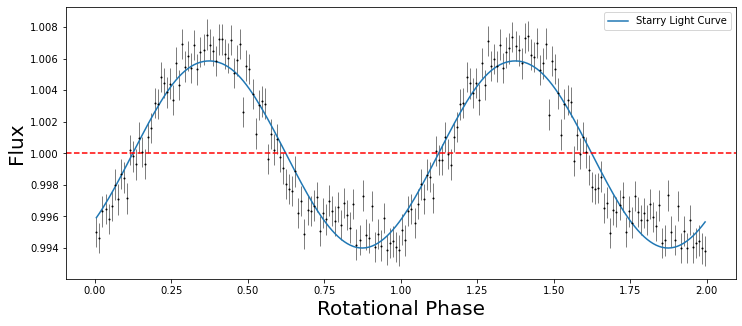

In [9]:
plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--');

In [10]:
residuals = (meanFlux - newFlux)/meanError
chi_squared = np.sum(residuals**2)
chi_squared

344.7044021871844

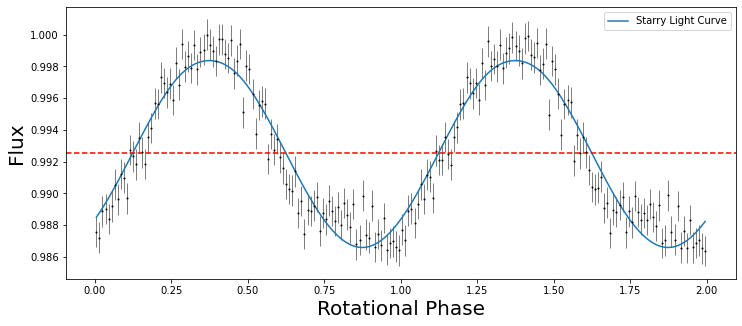

In [13]:
plt.figure(figsize=(12, 5))

plt.plot(meanPhase, map.flux(theta=theta), label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, flux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=np.mean(flux), color='r', linestyle='--');

In [14]:
residuals = (flux - map.flux(theta=theta))/meanError
chi_squared = np.sum(residuals**2)
chi_squared

339.20817894121694

In [15]:
new_error = flux_err/np.amax(meanFlux)

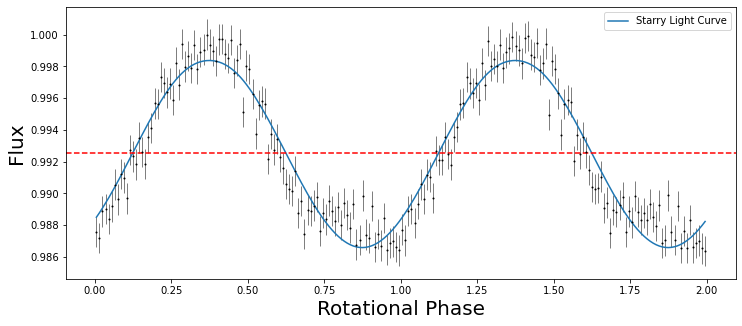

In [16]:
plt.figure(figsize=(12, 5))

plt.plot(meanPhase, map.flux(theta=theta), label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, flux, yerr=new_error, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=np.mean(flux), color='r', linestyle='--');

In [17]:
residuals = (flux - map.flux(theta=theta))/new_error
chi_squared = np.sum(residuals**2)
chi_squared

344.34204671584604